Импортируем библиотеки, необходимые для решения задачи

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

Загрузим данные

In [10]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Найдем распределение целевой переменной

In [11]:
count_classes = pd.value_counts(data['Class'], sort = False)

На графике ниже видно, что целевая переменная несбалансирована

Text(0.5, 1.0, 'Распределение целевой переменной')

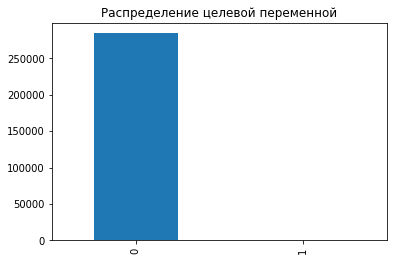

In [12]:
count_classes.plot (kind='bar')
plt.title ("Распределение целевой переменной")

<AxesSubplot:ylabel='Frequency'>

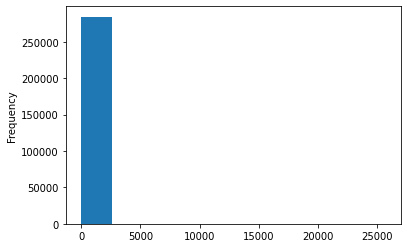

In [13]:
data['Amount'].sort_values().plot.hist()

Переменная Amount имеет сильный скок в распределении, поэтому прологарифимруем ее, чтобы уменьшить скос

<AxesSubplot:ylabel='Frequency'>

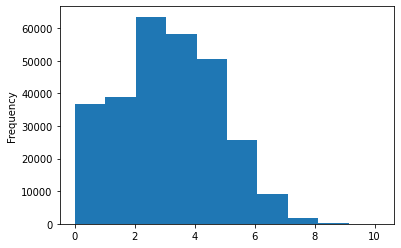

In [14]:
data['logAmount'] = np.log(data['Amount']+1)
data['logAmount'].sort_values().plot.hist()

Нормализуем данные, уменьшим дизбаланс и разаобьем на тестовую и обучающую выборки

In [15]:
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['Time', 'Amount','logAmount'], axis = 1);

In [16]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1]);

In [17]:
number_records_fraud = len (data[data.Class==1])
fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

In [18]:
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [19]:
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [20]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [77]:
MLPC = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)
y_pred_test = MLPC.predict(X_test)
y_pred_train = MLPC.predict(X_train_under)

recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_test, y_pred_test)
print(f'test recall : {recall_test}')
print(f'train recall : {recall_train}')

c:\users\valeria\desktop\torch\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


test recall : 0.9591836734693877
train recall : 0.9591836734693877
